In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl
from scipy.stats import kstest
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
fig_width = 7.5
fig_height = 10.0
fig_size = [fig_width,fig_height]
params = {'backend': 'pdf',
          'font.size'      : 30*fig_width/8.5,
          'axes.labelsize' : 30*fig_width/8.5,
          'xtick.labelsize': 30*fig_width/8.5,
          'ytick.labelsize': 30*fig_width/8.5,
          'text.usetex'    : True,
          'figure.figsize' : fig_size,
          'figure.dpi'     : 300,
          'axes.unicode_minus': True}
mpl.rcParams.update(params)
plt.style.use('_mpl-gallery-nogrid')
%matplotlib inline

In [135]:
#mpl.use('TkAgg')

In [143]:
#datafiles = glob.glob('data/nulling*')
datafiles = ['data/nulling_J0957-0619.txt','data/nulling_J2145+2158.txt','data/nulling_J2210+5712.txt']
durations = [594.081, 292.25910272, 292.09133056] # file durations in seconds

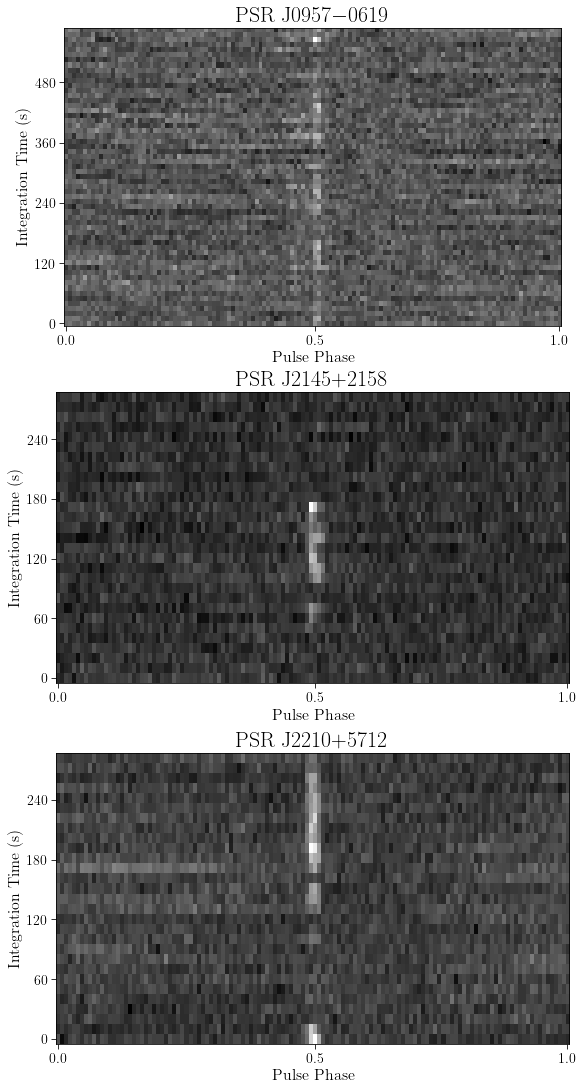

In [184]:
fig, axes = plt.subplots(nrows=len(datafiles), ncols=1,sharex=False,figsize=(7.5,15))
for dfile,duration,ax in zip(datafiles,durations,axes.flat):
    psrname = dfile.split("_")[1].strip(".txt").replace("-","$-$")
    data = np.loadtxt(dfile,dtype=float)
    nbin = 128
    bins = np.arange(1,nbin+1,1)
    phases = [b/nbin for b in bins]
    nsub = int(len(data)/nbin)
    subints = np.arange(1,nsub+1,1)
    subint_length = duration/nsub
    times = [(si-0.5)*subint_length for si in subints]
    new_data = np.empty((nsub,nbin))
    for sample in data:
        subint = int(sample[0])
        bin_num = int(sample[2])
        point = sample[3]
        new_data[subint,bin_num] = point
    if psrname=="J0957$-$0619":
        ax.imshow(np.roll(new_data,13), cmap='gray', aspect=1.3, origin='lower')
        ytick_interval = 120./subint_length
    elif psrname=="J2145+2158":
        ax.imshow(np.roll(new_data,35), cmap='gray', aspect=2.5, origin='lower')
        ytick_interval = 60./subint_length
    elif psrname=="J2210+5712":
        ax.imshow(np.roll(new_data,-55), cmap='gray', aspect=2.5, origin='lower')
        ytick_interval = 60./subint_length
    n_ticks = int(nsub // ytick_interval) + 1
    ytick_subints = [i*ytick_interval for i in range(n_ticks)]
    ax.set_xlabel('Pulse Phase',fontsize=16)
    ax.set_ylabel('Integration Time (s)',fontsize=16)
    ax.set_xticks([0., 64.0, 127.0])
    ax.set_xticklabels(["0.0","0.5","1.0"],fontsize=16)
    ytick_times = [si*subint_length for si in ytick_subints]
    ax.set_yticks(ytick_subints)
    ax.set_yticklabels([f"{t:.0f}" for t in ytick_times],fontsize=16)
    #ax.set_title(f"PSR {psrname}~~~~~~~~~~~~~~~~~~~~~820 MHz", fontsize=22)
    ax.set_title(f"PSR {psrname}", fontsize=22)
    ax.tick_params(axis='both', which='both', direction='out', size=5, labelsize=14)
#fig.subplots_adjust(hspace=0)
fig.tight_layout(pad=0.0, w_pad=0.5, h_pad=0.25)
fig.savefig("nulling.pdf", format="pdf",bbox_inches='tight')

In [9]:
def get_DMX_data(fname):
    DMX_data = np.loadtxt(fname, dtype=float)
    mjds = []
    DMXs = []
    DMX_errs = []
    for epoch in DMX_data:
        start, end = epoch[0], epoch[1]
        mjd = (start + end)/2.
        DMX, DMX_err = epoch[2], epoch[3]
        if np.abs(DMX) >= 0.0000000000000001 and DMX_err >= 0.000000000000001:
            mjds.append(mjd)
            DMXs.append(DMX)
            DMX_errs.append(DMX_err)
    mjds = np.array(mjds)
    DMXs = np.array(DMXs)
    DMX_errs = np.array(DMX_errs)
    return mjds, DMXs, DMX_errs

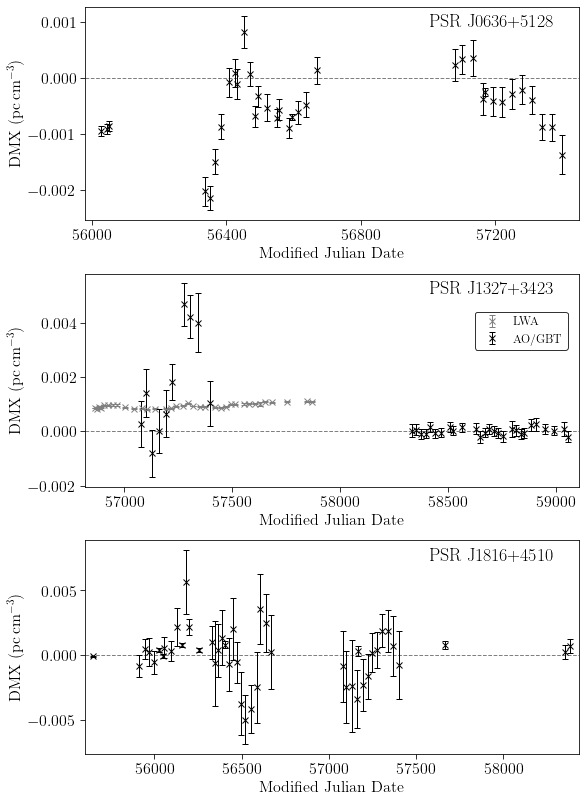

In [10]:
psrs = ["J0636+5128", "J1327+3423", "J1816+4510"]
fig, axes = plt.subplots(nrows=len(psrs),ncols=1,figsize=(7,12))
for i,psr in enumerate(psrs):
    pretty_psr_name = f"PSR {psr}".replace("-","$-$")
    ax = axes[i]
    mjds, DMXs, DMX_errs = get_DMX_data(f"data/{psr}_DMX.dat")
    ax.set_xlabel("Modified Julian Date",fontsize=16)
    ax.set_ylabel(r"DMX (pc\,cm$^{-3}$)",fontsize=16)
    if psr=="J1327+3423":
        LWA = True
        mjds_LWA, DMXs_LWA, DMX_errs_LWA = get_DMX_data("data/J1327+3423_LWADMX.dat")
        dm_ao = 4.1828998054299289257
        dm_lwa = 4.1837999999999999998 # used different fiducial DM in LWA fit
        ddm = dm_lwa - dm_ao
        DMXs_LWA = [dmx+ddm for dmx in DMXs_LWA]
        DMXs_AO = DMXs[10:]
        x_min = min([min(mjds), min(mjds_LWA)])-50
        x_max = max([max(mjds), max(mjds_LWA)])+50
        xlim = [x_min, x_max]
        ax.set_xlim(xlim)
        #ax.set_ylim([-0.0023, 0.0057])
        ax.set_xticks([57000,57500,58000,58500,59000])
    elif psr=="J0636+5128":
        LWA = False
        x_min = min(mjds)-50
        x_max = max(mjds)+50
        xlim = [x_min, x_max]
        ax.set_xlim(xlim)
        ax.set_xticks([56000,56400,56800,57200])
    elif psr=="J1816+4510":
        LWA = False
        x_min = min(mjds)-50
        x_max = max(mjds)+50
        xlim = [x_min, x_max]
        ax.set_xlim(xlim)
    ax.plot(xlim,[0,0],linewidth=1,linestyle='--',color='gray')
    if LWA:
        ax.errorbar(mjds_LWA,DMXs_LWA,yerr=DMX_errs_LWA,c='gray',ms=5.2,fmt='x',ecolor='gray',elinewidth=1,capsize=3,label="LWA")
        ax.errorbar(mjds,DMXs,yerr=DMX_errs,c='black',ms=5.2,fmt='x',ecolor='black',elinewidth=1,capsize=3,label="AO/GBT")
        ax.legend(loc=1,bbox_to_anchor=(0.99,0.85),edgecolor='black',fontsize=12)
    else:
        ax.errorbar(mjds,DMXs,yerr=DMX_errs,c='black',ms=5.2,fmt='x',ecolor='black',elinewidth=1,capsize=3)
    ax.tick_params(axis='both', which='both', direction='out', size=5, labelsize=16)
    ax.text(0.95,0.93,pretty_psr_name,color='black',rotation=0,size=18,va='center',ha='right',transform=ax.transAxes)
    
fig.subplots_adjust(hspace=0.25)
fig.savefig(f"DMX.pdf", format="pdf", bbox_inches="tight", pad_inches=0.25)

In [6]:
atnf_alphas = np.loadtxt("data/atnf_alphas.dat",usecols=[2],dtype=str)
atnf_alphas = atnf_alphas[atnf_alphas != '*'].astype('float')
thispaper = [-0.3, -1.2, -0.7, -1.9, -1.0, -1.0, -0.1, -1.84, -1.4, -1.5, -1.4, -2.9, -0.6, -2.0, -2.0, -2.1, -2.3, -2.7, -2.4, -0.8, -1.8]

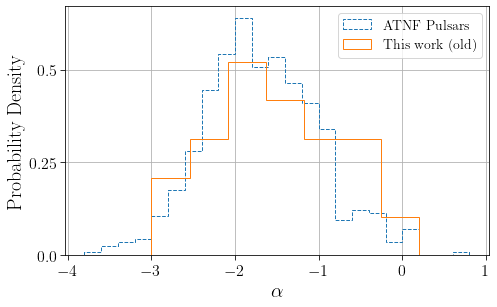

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
bins_1=np.linspace(-3.8,0.8,24)
bins_2=np.linspace(-3.0,0.2,8)
# bins_1=26
# bins_2=6
ax.hist(atnf_alphas,bins=bins_1,density=True,histtype='step',label="ATNF Pulsars",linestyle='--')
#ax2 = ax
ax.hist(thispaper,bins=bins_2,density=True,histtype='step',label="This work (old)",alpha=1.0)
ax.set_xlabel(r"$\alpha$",fontsize=20)
ax.set_ylabel("Probability Density",fontsize=20)
ax.tick_params(axis='both', which='both', direction='out', size=5, labelsize=16)
ax.set_yticks([0.0, 0.25, 0.5])
ax.set_yticklabels(["0.0", "0.25", "0.5"],fontsize=16)
plt.legend(fontsize=14)
plt.grid("True")
fig.savefig("alpha_hist.pdf", format="pdf", bbox_inches="tight", pad_inches=0.25)
plt.show()

In [69]:
kstest(rvs=thispaper,cdf=atnf_alphas)

KstestResult(statistic=0.175990675990676, pvalue=0.5000770459713466)